In [1]:
# Problem Statement:

# 1) Pokémon is a group of adorable creatures peacefully colonizing a planet until humans come along and make them combat each
# other in order to get shiny badges and we can call them Pokémon masters.

# 2) In this universe, there exists a group of rare and often strong Pokémon, known as Legendary Pokémon. Unfortunately, there 
# are no detailed criteria that define these Pokémon.

# 3) The only way to recognize a Legendary Pokémon is through information from official media, such as the game or anime.
# 4) This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, 
# Defense,Special Attack, Special Defense, and Speed. The legend of a pokemon cannot be suspected only by its Attack and 
# Defense. 
    
# It would be worth finding which variables can define the legend of a pokemon. 

# The strategy is to analyze the data and perform a predictive task of classification to predict the legend of a pokemon using a
# decision tree algorithm.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv('PokemonData.csv')
df.head()

,Num,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Num         800 non-null    int64 
 1   Name        800 non-null    object
 2   Type1       800 non-null    object
 3   Type2       414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   SpAtk       800 non-null    int64 
 8   SpDef       800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
df.isnull().sum()

Num             0
Name            0
Type1           0
Type2         386
HP              0
Attack          0
Defense         0
SpAtk           0
SpDef           0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
df.columns

Index(['Num', 'Name', 'Type1', 'Type2', 'HP', 'Attack', 'Defense', 'SpAtk',
       'SpDef', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [7]:
drop_cols = ['Num', 'Name', 'Type2']
df.drop(drop_cols,axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type1       800 non-null    object
 1   HP          800 non-null    int64 
 2   Attack      800 non-null    int64 
 3   Defense     800 non-null    int64 
 4   SpAtk       800 non-null    int64 
 5   SpDef       800 non-null    int64 
 6   Speed       800 non-null    int64 
 7   Generation  800 non-null    int64 
 8   Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(1)
memory usage: 50.9+ KB


In [18]:
# We need to do Label encoding of the object columns:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Type1'] = le.fit_transform(df['Type1'])

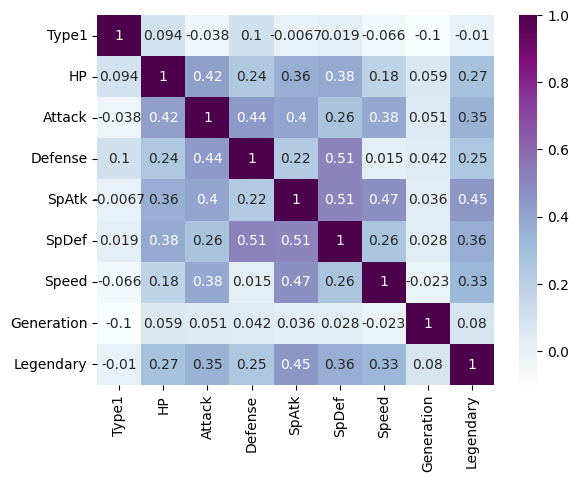

In [19]:
sns.heatmap(df.corr(),annot=True,cmap="BuPu") 
plt.show()

In [20]:
df.columns

Index(['Type1', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')

In [21]:
x = df.drop('Legendary',axis=1)
y = df['Legendary']

In [22]:
# but before building the model let use check which model at what depth can give us the best accuracy:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [23]:
# now lets split the model into train and test:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [24]:
# checking the best parameter values:
c_parm = 'max_depth'
c_parm_val = list(range(1,21))
dframe = pd.DataFrame(columns=[c_parm,'accuracy'])

for input_parameter in c_parm_val:
    dt = DecisionTreeClassifier(max_depth=input_parameter,splitter='best')
    dt.fit(x_train,y_train) 
    y_pred = dt.predict(x_test) 
    acc_score = accuracy_score(y_test,y_pred)*100
    dframe = dframe.append({c_parm:input_parameter, 'accuracy':  acc_score}, ignore_index=True) 
print(dframe)
print('')

    max_depth  accuracy
0         1.0    93.750
1         2.0    94.375
2         3.0    95.625
3         4.0    95.625
4         5.0    96.250
5         6.0    95.000
6         7.0    94.375
7         8.0    93.750
8         9.0    93.750
9        10.0    95.000
10       11.0    93.125
11       12.0    94.375
12       13.0    95.000
13       14.0    95.000
14       15.0    95.000
15       16.0    94.375
16       17.0    95.000
17       18.0    95.000
18       19.0    95.625
19       20.0    95.625



In [25]:
# lets take max_depth = 5

In [26]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(x_train,y_train) 
dt_model.score(x_test,y_test)

0.9625